In [1]:
import pandas as pd 
import os
import re 
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')  

In [2]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

In [3]:
# import the new cleaned file below 

In [4]:
# ignore
#clean = pd.read_csv('/Users/k/Desktop/Final_project_disaster/End_Of_Semester_Proj/f_df_clean.csv')

In [59]:
# new  

file_1 = pd.read_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events1.csv')
file_2 = pd.read_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events2.csv')

###old
file_1 = pd.read_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events1.csv')
file_2 = pd.read_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events2.csv')
file_3 = pd.read_csv('/Users/k/Desktop/Storm_type_final_project/clean_csv/storm_events3.csv')

In [60]:
file_1.head(2)

,Unnamed: 0,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,0,1615,ARKANSAS,5,2008,February,Hail,C,127,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,N,34.93,1,0.0,34.93,-94.18,0,0.0
1,1,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,N,34.60,1,0.0,34.60,-91.20,0,0.0


In [61]:
file_2.head(2)

,Unnamed: 0,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,208208,0,ILLINOIS,17,2012,January,Flood,C,59,PAH,0,0,0,0,50.0,EG,Heavy Rain,N,NNW,37.705,1,0.00,37.7000,-88.1300,3,0.0
1,208209,0,ILLINOIS,17,2012,January,Flood,C,59,PAH,0,0,0,0,50.0,EG,Heavy Rain,N,NNW,37.705,2,1.23,37.7134,-88.1152,3,0.0


In [62]:
#merge the files backtoger on axis 1 

In [63]:
clean = pd.concat([file_1,file_2],axis=0)

In [ ]:
# Remove repeated index from all 2 dataframes 

In [64]:
clean.head()

,Unnamed: 0,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,0,1615,ARKANSAS,5,2008,February,Hail,C,127,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,N,34.9300,1,0.00,34.9300,-94.1800,0,0.0
1,1,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,N,34.6000,1,0.00,34.6000,-91.2000,0,0.0
2,2,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,1,37.72,32.3750,-111.0101,0,0.0
3,3,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,2,37.47,32.3746,-111.0057,0,0.0
4,4,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,3,37.82,32.3661,-111.0131,0,0.0


In [65]:
clean = clean.drop(['Unnamed: 0'],axis=1)

In [66]:
clean.head(3)

,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,1615,ARKANSAS,5,2008,February,Hail,C,127,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,N,34.9300,1,0.00,34.930,-94.1800,0,0.0
1,1320,ARKANSAS,5,2008,January,Thunderstorm Wind,C,95,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,N,34.6000,1,0.00,34.600,-91.2000,0,0.0
2,300,ARIZONA,4,2008,January,Flood,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,1,37.72,32.375,-111.0101,0,0.0


In [67]:
# check to see that you have the correct number of columns and rows that you did from the cleaning 
clean.shape 


(416414, 25)

In [68]:
clean['event_type'].value_counts().index

Index(['Thunderstorm Wind', 'Flash Flood', 'Hail', 'Flood', 'Tornado',
       'Heavy Rain'],
      dtype='object')

In [69]:
clean['event_type'].value_counts()

Thunderstorm Wind    125741
Flash Flood          102875
Hail                  83297
Flood                 76049
Tornado               19014
Heavy Rain             9438
Name: event_type, dtype: int64

In [70]:
# create a loop to encode the y column yourself 
# not sure if labelencoder will work 

# Encode event type column 

In [71]:
def encode_event_type(x):
    if x == 'Thunderstorm Wind':
        return 0
    elif x == 'Flash Flood':
        return 1
    elif x == 'Hail':
        return 2        
    elif x == 'Flood':
        return 3
    elif x =='Tornado':
        return 4
    else:
        return 5

In [72]:
clean['event_type']=list(map(encode_event_type,clean['event_type']))

In [73]:
clean['event_type'].value_counts()

0    125741
1    102875
2     83297
3     76049
4     19014
5      9438
Name: event_type, dtype: int64

In [74]:
clean.head()

,begin_time,state,state_fips,year,month_name,event_type,cz_type,cz_fips,wfo,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,magnitude_type,flood_cause,begin_azimuth,end_azimuth,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,1615,ARKANSAS,5,2008,February,2,C,127,LZK,0,0,0,0,1.75,EG,Heavy Rain,N,N,34.9300,1,0.00,34.9300,-94.1800,0,0.0
1,1320,ARKANSAS,5,2008,January,0,C,95,LZK,0,0,0,0,50.00,EG,Heavy Rain,N,N,34.6000,1,0.00,34.6000,-91.2000,0,0.0
2,300,ARIZONA,4,2008,January,3,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,1,37.72,32.3750,-111.0101,0,0.0
3,300,ARIZONA,4,2008,January,3,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,2,37.47,32.3746,-111.0057,0,0.0
4,300,ARIZONA,4,2008,January,3,C,19,TWC,0,0,0,0,50.00,EG,Heavy Rain,W,W,32.3691,3,37.82,32.3661,-111.0131,0,0.0


# order of operations 

- scale numerical sbefore since you have /encode categoricals 
- imbalance same time (scale)(smote num)
- (can scale numerical before or after)

- train test
- classification


# START HERE 


In [75]:
y = clean['event_type']
X = clean.drop(['event_type'],axis=1)

In [76]:
cat = X.select_dtypes(np.object)
num = X.select_dtypes(np.number)

# Imbalanced data
- HELP is this done after the data has been scaled?  
- try both oversampling and undersampling 
- probably after its been scaled with the categorical data 

In [77]:
cat.head()

,state,month_name,cz_type,wfo,magnitude_type,flood_cause,begin_azimuth,end_azimuth
0,ARKANSAS,February,C,LZK,EG,Heavy Rain,N,N
1,ARKANSAS,January,C,LZK,EG,Heavy Rain,N,N
2,ARIZONA,January,C,TWC,EG,Heavy Rain,W,W
3,ARIZONA,January,C,TWC,EG,Heavy Rain,W,W
4,ARIZONA,January,C,TWC,EG,Heavy Rain,W,W


In [78]:
num.head()

,begin_time,state_fips,year,cz_fips,injuries_direct,injuries_indirect,deaths_direct,deaths_indirect,magnitude,end_lat,location_index,range,latitude,longitude,duration,damage_crops_a
0,1615,5,2008,127,0,0,0,0,1.75,34.9300,1,0.00,34.9300,-94.1800,0,0.0
1,1320,5,2008,95,0,0,0,0,50.00,34.6000,1,0.00,34.6000,-91.2000,0,0.0
2,300,4,2008,19,0,0,0,0,50.00,32.3691,1,37.72,32.3750,-111.0101,0,0.0
3,300,4,2008,19,0,0,0,0,50.00,32.3691,2,37.47,32.3746,-111.0057,0,0.0
4,300,4,2008,19,0,0,0,0,50.00,32.3691,3,37.82,32.3661,-111.0131,0,0.0


In [79]:
# do the scaling together with smote since it only likes numerical data 

# scale 

In [80]:
from sklearn.preprocessing import OneHotEncoder  

In [81]:
cat_prep = OneHotEncoder().fit_transform(cat).toarray()
cat_prep 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
from sklearn.preprocessing import MinMaxScaler 

In [83]:
a_num = MinMaxScaler().fit_transform(num)
pd.DataFrame(a_num).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.684612,0.040816,0.0,0.437500,0.0,0.0,0.0,0.0,0.012379,0.599361,0.000000,0.000000,0.598964,0.237759,0.0,0.0
1,0.559559,0.040816,0.0,0.326389,0.0,0.0,0.0,0.0,0.381065,0.595356,0.000000,0.000000,0.594962,0.246992,0.0,0.0
2,0.127173,0.030612,0.0,0.062500,0.0,0.0,0.0,0.0,0.381065,0.568281,0.000000,0.208929,0.567977,0.185615,0.0,0.0
3,0.127173,0.030612,0.0,0.062500,0.0,0.0,0.0,0.0,0.381065,0.568281,0.142857,0.207544,0.567972,0.185629,0.0,0.0
4,0.127173,0.030612,0.0,0.062500,0.0,0.0,0.0,0.0,0.381065,0.568281,0.285714,0.209483,0.567869,0.185606,0.0,0.0


# put together 

In [84]:
scaled_a = np.concatenate((cat_prep,a_num),axis=1)
scaled_a=pd.DataFrame(scaled_a) 

In [85]:
scaled_a.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.684612,0.040816,0.0,0.437500,0.0,0.0,0.0,0.0,0.012379,0.599361,0.000000,0.000000,0.598964,0.237759,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559559,0.040816,0.0,0.326389,0.0,0.0,0.0,0.0,0.381065,0.595356,0.000000,0.000000,0.594962,0.246992,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.127173,0.030612,0.0,0.062500,0.0,0.0,0.0,0.0,0.381065,0.568

In [86]:
scaled_a.shape

(416414, 251)

In [87]:
X = scaled_a

In [88]:
y.shape

(416414,)

In [89]:
y.head(3)

0    2
1    0
2    3
Name: event_type, dtype: int64

# SMOTE 

The SMOTE algorithm can be broken down into foll. steps:
Randomly pick a point from the minority class.
Compute the k-nearest neighbors (for some pre-specified k) for this point.
Add k new points somewhere between the chosen point and each of its neighbors.

In [90]:
pip install imblearn


Note: you may need to restart the kernel to use updated packages.


In [91]:
pip install scipy 

Note: you may need to restart the kernel to use updated packages.


In [92]:
from imblearn.over_sampling import SMOTE 


In [93]:
oversample = SMOTE() 
X_sm,y_sm = oversample.fit_resample(X,y) 
y_sm.value_counts()

2    125741
0    125741
3    125741
1    125741
4    125741
5    125741
Name: event_type, dtype: int64

# UnderSampling using TomekLinks

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

In [38]:
from imblearn.under_sampling import TomekLinks

In [40]:
t1 = TomekLinks('majority')
X_t1, y_t1 = t1.fit_resample(X,y)
y_t1.value_counts()

0    120387
1    102543
2     82838
3     75889
4     18900
5      9412
Name: event_type, dtype: int64

# Train test split 

## smote 

In [94]:
#use the new balanced data X_sm,y_sm

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size = 0.4,random_state=100)

## tomeklinks

In [41]:
from sklearn.model_selection import train_test_split
Xt_train,Xt_test,yt_train,yt_test = train_test_split(X_t1, y_t1,test_size = 0.4,random_state=100)

# Classification model  
- try as many models as you can at least 3 
- try : xg boost 
- want the best accuracy  
- dont worry about the score do the analysis befor tuesday 
- if you have time improve the accuracy of the model 
- jupyter not for buisness settings 
    - pycharm ( best to send to others )
        - create different functions  
        - easier to debugg the code  
        - writing the code for someone else to read it 

In [35]:
# not linear
# logistic caluculates the probability of an event happeing
    #one-vs-rest (OvR)  
    #

In [36]:
# try random forest decision trees as your other model 

# Logistic Regression

In [95]:
from sklearn.metrics import mean_absolute_error

## smote 

In [96]:
# use the training set to train the model 
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = 'ovr',random_state=0).fit(X_train,y_train)

# new line below 
y_pred=clf.predict(X_test)


In [97]:
clf.score(X_test,y_test)
# 78% of the time the prediction is on point 


0.784928706106124

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.784928706106124

In [99]:
# mean absolute error 
mean_absolute_error(y_test,y_pred)

0.5821014716067056

## tomeklinks

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class = 'ovr',random_state=0).fit(Xt_train,yt_train)

# new line below 
y_predt=clf.predict(Xt_test)


In [44]:
clf.score(Xt_test,yt_test)

0.8053150230504671

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(yt_test,y_predt)

0.8053150230504671

In [54]:
# mean absolute error 
mean_absolute_error(yt_test,y_predt)

0.4478864307144425

In [ ]:
#r^2 


In [39]:
# check the accruacy on the test data 

## Confusion matrix 

## smote 

In [100]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test , y_pred)

print('confusion matrix\n')
print(confusion)

#labels=['Thunderstorm Wind', 'Flash Flood', 'Hail', 'Flood', 'Tornado','Heavy Rain']
#0-5

confusion matrix

[[39624  1388     5   409  4580  4210]
 [ 3801 31664     0  6073  5622  3047]
 [    0     0 50151     0     1     0]
 [ 1582  8341     0 35614  2238  2498]
 [ 3709  4078     0  1375 38560  2665]
 [ 3821   924     0  1558  2979 41262]]


In [101]:
# week 9 notes lab with logistical regression 
# also good for logistic reveiw 
0:'Thunderstorm Wind'
1:'Flash Flood'
2:'Hail'
3:'Flood'
4:'Tornado'
5:'Heavy Rain'

SyntaxError: illegal target for annotation (3045691302.py, line 3)

[[39624  1388     5   409  4580  4210]
 [ 3801 31664     0  6073  5622  3047]
 [    0     0 50151     0     1     0]
 [ 1582  8341     0 35614  2238  2498]
 [ 3709  4078     0  1375 38560  2665]
 [ 3821   924     0  1558  2979 41262]]


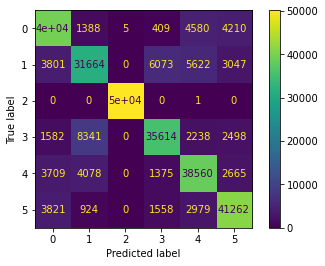

kappa of the model: 0.7435105145904182


In [102]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(clf,X_test,y_test)
plt.show() 
print('kappa of the model:',(cohen_kappa_score(yt_test,y_predt)))

## tomeklinks 

In [ ]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(yt_test , y_predt)

print('confusion matrix\n')
print(confusion)

#labels=['Thunderstorm Wind', 'Flash Flood', 'Hail', 'Flood', 'Tornado','Heavy Rain']
#0-5

[[45710  1720     6   463   244   107]
 [ 6460 30357     0  3681   393   287]
 [    0     0 32886     1     0     0]
 [ 2375  7469     0 20376    87    66]
 [ 3035  2369     0   472  1726    40]
 [ 1507   432     0   650    62  1007]]


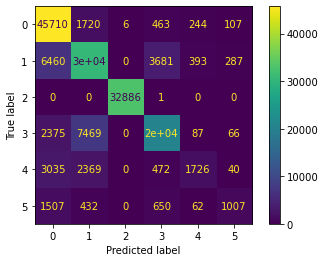

kappa of the model: 0.7435105145904182


In [57]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
print(confusion_matrix(yt_test,y_predt))
plot_confusion_matrix(clf,Xt_test,yt_test)
plt.show() 
print('kappa of the model:',(cohen_kappa_score(yt_test,y_predt)))

# Random forests 


## smote 

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RFC = RandomForestClassifier(max_depth=3,random_state=0) 
RFC.fit(X_train,y_train)
print(RFC.score(X_test,y_test))

0.7297989588407411


## tomeklinks

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier(max_depth=3,random_state=0) 
RFC.fit(Xt_train,yt_train)
print(RFC.score(Xt_test,yt_test))

0.6867941556699271


# XG boost 
- XG boost
- Boosting is an ensemble technique where new models are added to correct the errors made by existing models.
- https://scikit learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
    

## smote 

In [107]:
# ensable method 
# boosting bagging #. review bootstrapping 
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100,learning_rate=1.0,max_depth = 1, random_state =0).fit(X_train,y_train)
gbc.score(X_test,y_test)





KeyboardInterrupt: 

In [ ]:
## tomeklinks

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators = 100,learning_rate=1.0,max_depth = 1, random_state =0).fit(Xt_train,yt_train)
gbc.score(Xt_test,yt_test)

0.8223467570797863

In [ ]:
Tableau 
- columns month/year : row events(count)
    insights into which months/years have the most events happening 
- state and sum of deaths
    - take a look at which state has had the most total deaths 
- state event count
    - which areas in the united states get the most events  

- Develop your story 
    - graphs good units 
    - ie damage crops should have $ units 



_ MAGNITUDE DOSNT DO MUCH GOOD (check each events scale)
- check 2008 crop failure 
    - look at states that had the damage what did they have
# provide background information on weather patterns 
# tornados 
# air currents 
# water 
why the other half of the united states dosnt get as many evvents 
# can give intro on events concentrated into what area 

go big then (whole united states different years)small focus on the states 
top 3 states most damage 




focus on 2020, 2021 to stay relavent 

# what years are the most 
# most affected levels 
presentation(what to focus on)
distasters prone in which states 

- money (crop damage housing damage)
- informed decisions
- ppl (deaths)event type 







In [ ]:
# keep hail 
# do them all individually then put the dataframes together 
# 2 at a time( keep hail as the reference aka the one you will oversample on )

In [ ]:
END

In [ ]:
NOTES

In [ ]:
ROC AUC WILL HAVE to do for differnet pairs 

In [ ]:
# split clean final data into 3 chunks then combine in the code so its easier to push it back to git 